In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import re
import matplotlib.pyplot as plt
import glob, os    

In [2]:
#Combine all 3 Million Records to One Large Data Frame spread over Multiple .csv Files
df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "*.csv"))))
df.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: DtypeWarning: Columns (0,15,20) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: DtypeWarning: Columns (10,20) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,...,account_type,retweet,account_category,new_june_2018,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
0,2495567768,DAILYSANFRAN,Police: Airline pilot found passed out in cock...,United States,English,1/2/2017 14:39,1/2/2017 14:39,4577,16782,34960,...,local,0,NewsFeed,0,2495567768,815930489311789056,http://twitter.com/2495567768/statuses/8159304...,https://twitter.com/DailySanFran/status/815930...,http://kron4.com/2017/01/02/police-airline-pil...,NaN
1,2495567768,DAILYSANFRAN,Dashcam video shows man launching himself onto...,United States,English,1/2/2017 15:39,1/2/2017 15:39,4577,16782,34961,...,local,0,NewsFeed,0,2495567768,815945595546431488,http://twitter.com/2495567768/statuses/8159455...,https://twitter.com/DailySanFran/status/815945...,http://kron4.com/2017/01/02/dashcam-video-show...,NaN
2,2495567768,DAILYSANFRAN,Man Arrested For Setting Fire To South SF Medi...,United States,English,1/2/2017 16:19,1/2/2017 16:19,4577,16782,34962,...,local,0,NewsFeed,0,2495567768,815955659963432960,http://twitter.com/2495567768/statuses/8159556...,https://twitter.com/DailySanFran/status/815955...,http://sanfrancisco.cbslocal.com/2017/01/02/ma...,NaN
3,2495567768,DAILYSANFRAN,Practical tips to achieving your New Year's re...,United States,English,1/2/2017 16:29,1/2/2017 16:29,4577,16782,34963,...,local,0,NewsFeed,0,2495567768,815958175593730049,http://twitter.com/2495567768/statuses/8159581...,https://twitter.com/DailySanFran/status/815958...,http://abc7news.com/society/practical-tips-to-...,NaN
4,2495567768,DAILYSANFRAN,Couple disappears during trip to Big Sur https...,United States,English,1/2/2017 16:39,1/2/2017 16:39,4577,16781,34964,...,local,0,NewsFeed,0,2495567768,815960697800626176,http://twitter.com/2495567768/statuses/8159606...,https://twitter.com/DailySanFran/status/815960...,http://kron4.com/2017/01/02/couple-disappears-...,NaN


In [3]:
# Convert Date Format to DateTime So that we can easily Filter Data based on time
df["publish_date"] = df["publish_date"].astype("datetime64")

Text(0, 0.5, 'Count')

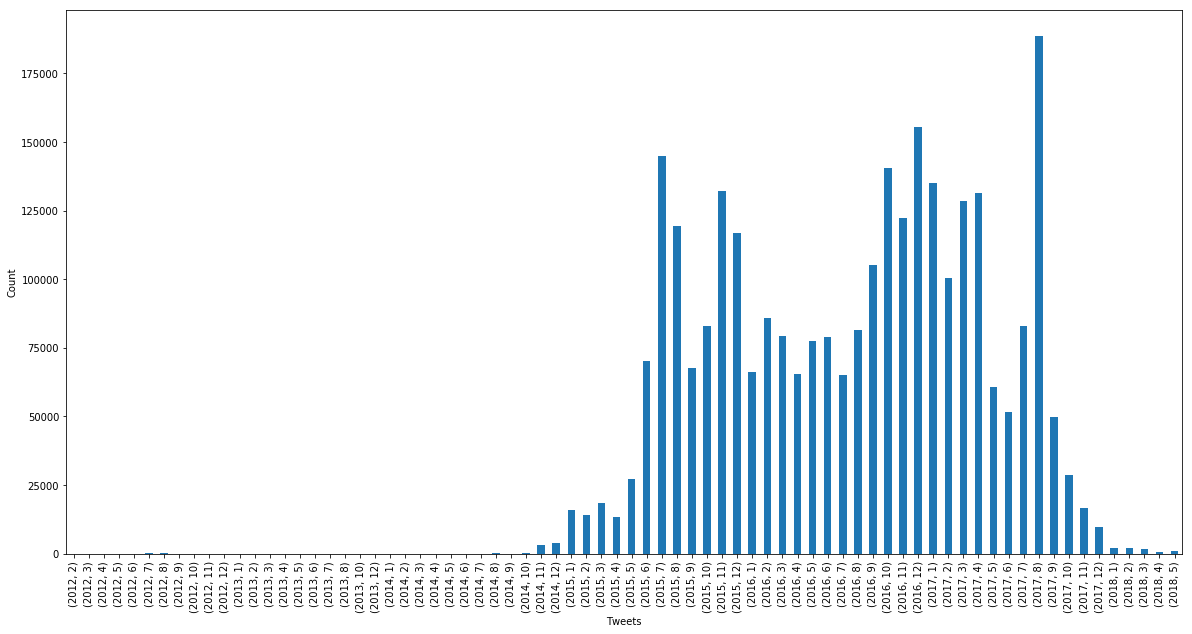

In [4]:
#Plot Entire data based on Months
number_plot = df["content"].groupby([df["publish_date"].dt.year, df["publish_date"].dt.month]).count().plot(kind="bar", figsize=(20,10))
number_plot.set_xlabel("Tweets")
number_plot.set_ylabel("Count")

In [0]:
#Important Observations 

# Ground work for the medling started way back in late 2014
# First Peak was around July 2015
# Consistent Tweets in the months leading upto the election (Peaks in November)
# Unexpected Result :
# Tweeting Increased after the elections suggesting that this not just election meddling but  
# a larger effort to undermine the politics in the US 
# Dive deeper with this information to find more Patterns


#Intresting Months 
# July 2015
# November 2015
# Semptember 2016
# October 2016
# November 2016
# August 2017


Text(0, 0.5, 'Count')

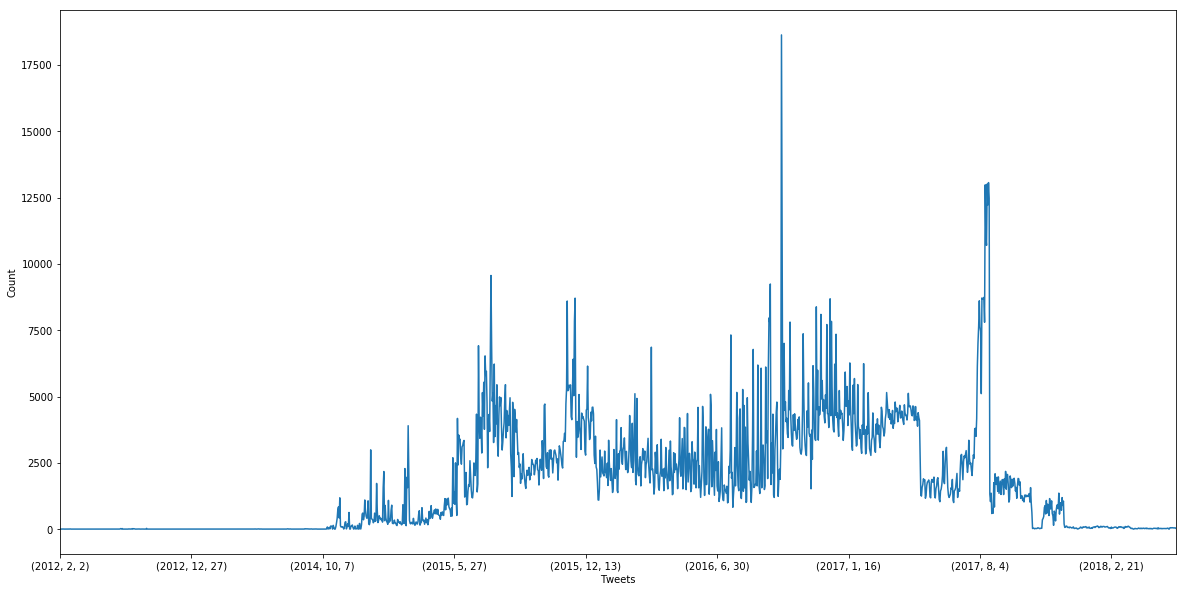

In [5]:
#Plot Entire data based on Months
number_plot = df["content"].groupby([df["publish_date"].dt.year, df["publish_date"].dt.month, df["publish_date"].dt.day  ]).count().plot(figsize=(20,10))
number_plot.set_xlabel("Tweets")
number_plot.set_ylabel("Count")
#number_plot.axes.get_xaxis().set_visible(False)


In [0]:
#We see a huge Spike in October 2016 Specifically, Oct 6 2016

In [6]:
#Fetch English Tweets
df_english = df.loc[df['language'] == "English"]
df_english.count()

external_author_id    2116867
author                2116867
content               2116866
region                2115731
language              2116867
publish_date          2116867
harvested_date        2116867
following             2116867
followers             2116867
updates               2116867
post_type              852536
account_type          2116867
retweet               2116867
account_category      2116867
new_june_2018         2116867
alt_external_id       2116867
tweet_id              2116867
article_url           2116867
tco1_step1            1358060
tco2_step1             450925
tco3_step1              14075
dtype: int64

In [7]:
#Account Types 
df_accountTypecount = df_english.groupby(['account_type'])['account_type'].count()
df_accountTypecount = pd.DataFrame({'account_type':df_accountTypecount.index, 'count':df_accountTypecount.values})
df_accountTypecount = df_accountTypecount.sort_values(by=['count'], ascending=False)
df_accountTypecount.head(20)

,account_type,count
11,Right,704953
15,local,458012
9,Left,422141
6,Hashtager,236092
16,news,138581
2,Commercial,112580
12,Russian,20015
8,Koch,10759
0,?,6945
5,German,3567


In [8]:
# Accounts with Most Number of Followers
df_authors = df_english[['author','followers']].drop_duplicates(subset='author', keep="first")
df_authors_sorted = df_authors.sort_values(by=['followers'], ascending=False)
df_authors_sorted.head(10)

,author,followers
8894,NOVOSTIMSK,206686
19650,KADIROVRUSSIA,90183
14135,MAXDEMENTIEV,90089
27991,NOVOSTISPB,82213
143658,TEN_GOP,63928
0,TODAYNYCITY,61789
193467,ELEVEN_GOP,59100
213445,JENN_ABRAMS,39014
128630,LAVROVMUESLI,35441
139147,PAMELA_MOORE13,33250


In [9]:
df_tweetcount = df_english.groupby(['author'])['author'].count()
df_tweetcount = pd.DataFrame({'Author':df_tweetcount.index, 'Count':df_tweetcount.values})
df_authors_sorted = df_tweetcount.sort_values(by=['Count'], ascending=False)
df_authors_sorted.head(10)

,Author,Count
737,EXQUOTE,53158
1815,SCREAMYMONKEY,43956
2115,WORLDNEWSPOLI,35082
126,AMELIEBALDWIN,34308
1989,TODAYPITTSBURGH,33377
1895,SPECIALAFFAIR,32416
1818,SEATTLE_POST,30680
1095,KANSASDAILYNEWS,28746
1755,ROOMOFRUMOR,28259
535,DAILYSANFRAN,27962


In [11]:
#Filter Tweets based on Important Months


#July 2015
start_date = '07-01-2015'
end_date = '07-31-2015'
df_Jul2015 = df_english.loc[(df_english['publish_date'] > start_date) & (df_english['publish_date'] <= end_date)]
df_Jul2015['tweet'] = df_Jul2015['content']

#November 2015
start_date = '11-01-2015'
end_date = '11-30-2015'
df_Nov2015 = df_english.loc[(df_english['publish_date'] > start_date) & (df_english['publish_date'] <= end_date)]
df_Nov2015['tweet'] = df_Nov2015['content']

#September 2016
start_date = '09-01-2016'
end_date = '09-30-2016'
df_Sep2016 = df_english.loc[(df_english['publish_date'] > start_date) & (df_english['publish_date'] <= end_date)]
df_Sep2016['tweet'] = df_Sep2016['content']

#October 2016
start_date = '10-01-2016'
end_date = '10-30-2016'
df_Oct2016 = df_english.loc[(df_english['publish_date'] > start_date) & (df_english['publish_date'] <= end_date)]
df_Oct2016['tweet'] = df_Oct2016['content']


#Novmber 2016
start_date = '11-01-2016'
end_date = '11-30-2016'
df_Nov2016 =df_english.loc[(df_english['publish_date'] > start_date) & (df_english['publish_date'] <= end_date)]
df_Nov2016['tweet'] = df_Nov2016['content']

#August 2017
start_date = '08-01-2017'
end_date = '08-30-2017'
df_Aug2017 = df_english.loc[(df_english['publish_date'] > start_date) & (df_english['publish_date'] <= end_date)]
df_Aug2017['tweet'] = df_Aug2017['content']



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view

Text(0, 0.5, 'Count')

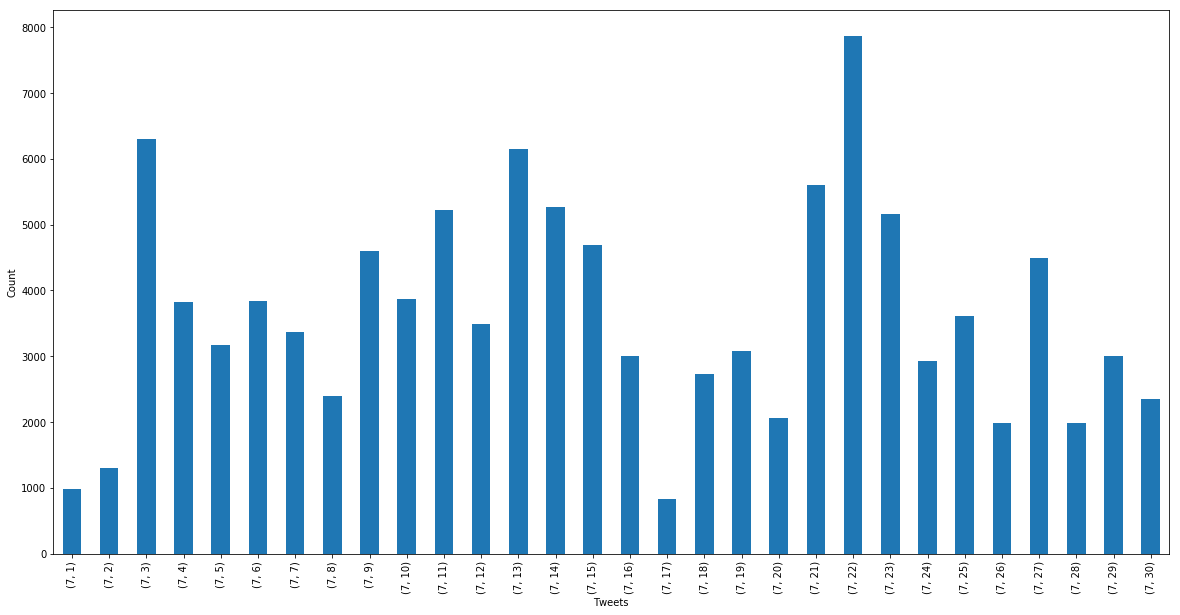

In [12]:
number_plot = df_Jul2015["content"].groupby([df_Jul2015["publish_date"].dt.month, df_Jul2015["publish_date"].dt.day]).count().plot(kind="bar", figsize=(20,10))
number_plot.set_xlabel("Tweets")
number_plot.set_ylabel("Count")

In [13]:
#Cleaning Unstructured Text Data
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [14]:
#Data Cleaning and Pre Processing
# def remove_links(tweet):
#     '''Takes a string and removes web links from it'''
#     tweet = re.sub(r'http\S+', '', tweet) # remove http links
#     tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
#     tweet = tweet.strip('[link]') # remove [links]
#     return tweet

# def remove_users(tweet):
#     '''Takes a string and removes retweet and @user information'''
#     tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
#     tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
#     return tweet

In [15]:
 import nltk
  
 nltk.download('stopwords')
 my_stopwords = nltk.corpus.stopwords.words('english')
# word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
# my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

# cleaning master function
# def clean_tweet(tweet, bigrams=False):
#     tweet = remove_users(tweet)
#     tweet = remove_links(tweet)
#     tweet = tweet.lower() # lower case
#     tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
#     tweet = re.sub('\s+', ' ', tweet) #remove double spacing
#     tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
#     tweet_token_list = [word for word in tweet.split(' ')
#                             if word not in my_stopwords] # remove stopwords

# #     tweet_token_list = [word_rooter(word) if '#' not in word else word
# #                         for word in tweet_token_list] # apply word rooter
#     if bigrams:
#         tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
#                                             for i in range(len(tweet_token_list)-1)]
#     tweet = ' '.join(tweet_token_list)
#     return tweet

from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def clean_tweet(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    
    tweet_token_list = [word for word in words
                      if word not in my_stopwords] # remove stopwords
    
    return (" ".join(tweet_token_list)).strip()



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akhileshanand/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
df_Jul2015['clean_tweet'] = df_Jul2015.tweet.apply(clean_tweet)


/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/zuIzbpejyw" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "http://t.co/figQ9WcMBI" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "http://t.co/Zp8k6j1VhG" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Sou

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(df_Jul2015['clean_tweet']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

In [100]:
df_Jul2015['clean_tweet'].count()


109158

In [18]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 10
#LDA
model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [19]:
model.fit(tf)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [20]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]

    return pd.DataFrame(topic_dict)

In [21]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,life,1250.3,news,4720.3,news,1874.7,sports,1225.9,workout,4312.5,exercise,10560.9,weight,9229.1,workout,4725.0,words,1257.1,workout,27875.7
1,right,1018.8,world,2524.5,man,1796.2,bb,981.1,diet,2719.1,one,1262.9,lose,6861.1,like,2768.0,money,767.7,good,3460.1
2,health,951.5,politics,1400.3,local,1558.0,sp,967.1,exercise,1096.2,time,1164.3,need,2371.8,love,1593.3,sports,538.4,get,2448.0
3,new,834.2,trump,1214.9,police,1218.7,obama,872.3,day,1055.8,u,771.3,loss,2357.1,fitness,1033.1,us,493.5,today,2436.7
4,know,773.1,iran,1102.1,topnews,866.9,america,664.1,going,862.3,week,708.0,fat,1828.5,feel,982.5,unitedstatesin,474.1,go,2254.6
5,always,492.9,says,1082.0,cleveland,849.7,video,538.8,lol,847.3,go,631.1,trying,816.3,pre,931.3,wasteamillionin,473.1,need,1887.9
6,someone,480.8,deal,1056.2,crime,828.1,baby,537.4,even,726.9,fitness,628.5,really,656.5,well,692.0,house,454.2,morning,1806.1
7,via,448.6,u,898.5,year,659.8,tcot,532.2,fitness,664.9,get,592.4,want,644.9,good,631.0,news,449.7,got,1571.0
8,must,420.1,new,683.4,woman,624.2,planned,482.1,new,544.7,let,485.7,way,562.6,want,554.9,white,400.5,time,1296.3
9,people,346.0,obama,635.8,miami,602.1,parenthood,419.1,tomorrow,542.4,see,474.3,help,539.4,night,499.9,buy,309.2,gym,1225.5


In [22]:
#NMF
from sklearn.decomposition import NMF
model = NMF(n_components=10, random_state=0, alpha=.1, l1_ratio=.5)
model.fit(tf)

NMF(alpha=0.1, beta_loss='frobenius', init=None, l1_ratio=0.5, max_iter=200,
  n_components=10, random_state=0, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

In [23]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,workout,22.4,lose,11.9,exercise,18.0,news,14.7,good,15.0,need,15.2,get,14.3,weight,9.1,u,12.6,go,13.8
1,today,1.2,weight,11.7,like,0.5,world,5.4,today,0.9,really,1.0,back,1.3,loss,9.1,sports,4.2,fitness,2.3
2,morning,0.8,want,0.7,eat,0.5,cleveland,1.2,feel,0.5,partner,0.8,time,1.3,diet,0.8,like,3.5,diet,2.2
3,pre,0.8,trying,0.7,time,0.4,says,1.0,morning,0.4,diet,0.6,fitness,0.9,tips,0.5,politics,3.1,gym,1.2
4,great,0.7,eat,0.5,lol,0.4,iran,1.0,ass,0.4,fat,0.5,fat,0.7,best,0.3,new,2.6,want,0.9
5,time,0.7,wanna,0.4,today,0.4,police,1.0,fitness,0.4,buddy,0.5,gotta,0.6,program,0.3,says,2.0,let,0.9
6,day,0.6,like,0.4,day,0.4,state,1.0,feels,0.4,new,0.4,let,0.5,fat,0.3,obama,1.9,wanna,0.8
7,got,0.6,lol,0.4,much,0.3,deal,0.8,got,0.4,asap,0.3,ready,0.4,plan,0.2,trump,1.8,back,0.5
8,done,0.5,gain,0.4,diet,0.3,us,0.7,feeling,0.4,back,0.3,trying,0.3,new,0.2,bb,1.6,gonna,0.5
9,like,0.5,help,0.4,great,0.3,islamic,0.6,day,0.3,someone,0.3,home,0.3,great,0.2,sp,1.6,sleep,0.4


In [0]:
#Major Topics of Discussions 
# 1. Weightloss
# 2. Trump Campaign
# 3. Planned Parenthood
# 4. Cleveland Police Shooting 



In [54]:
# in case hashtags are not found, we will use "0" as the placeholder
def extract_hashtags(tweet):
    '''Provide a tweet and extract hashtags from it'''
    hashtags_only = []
    if len(re.findall("(#[^#\s]+)", tweet)) > 0:
        hashtags_only.append(re.findall("(#[^#\s]+)", tweet))
    else:
        hashtags_only.append(["0"])
    return hashtags_only[0]

# make a new column to store the extracted hashtags and view them!
df_Jul2015['tweet_hashtags'] = df_Jul2015["content"].map(extract_hashtags)
df_Jul2015['tweet_hashtags'].head(10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


48961               [#DailyLifeIn4Words]
48962          [#DescribeBabiesIn3Words]
48963          [#describebabiesin3words]
48964    [#SuperheroPresidentialSlogans]
48965                   [#BernieSoBlack]
48966            [#TrumpCampaignSlogans]
48967            [#TrumpCampaignSlogans]
48968            [#TrumpCampaignSlogans]
48969            [#TrumpCampaignSlogans]
48970                          [#sports]
Name: tweet_hashtags, dtype: object

In [61]:
# create a list of all hashtags
all_hashtags = df_Jul2015['tweet_hashtags'].tolist()

# Next we observe that our all_hashtags is a list of lists...lets change that
cleaned_hashtags = []
for i in all_hashtags:
    for j in i:
            cleaned_hashtags.append(j)

# Convert cleaned_hashtags to a series and count the most frequent occuring
cleaned_hashtag_series = pd.Series(cleaned_hashtags)
hashtag_counts = cleaned_hashtag_series.value_counts()

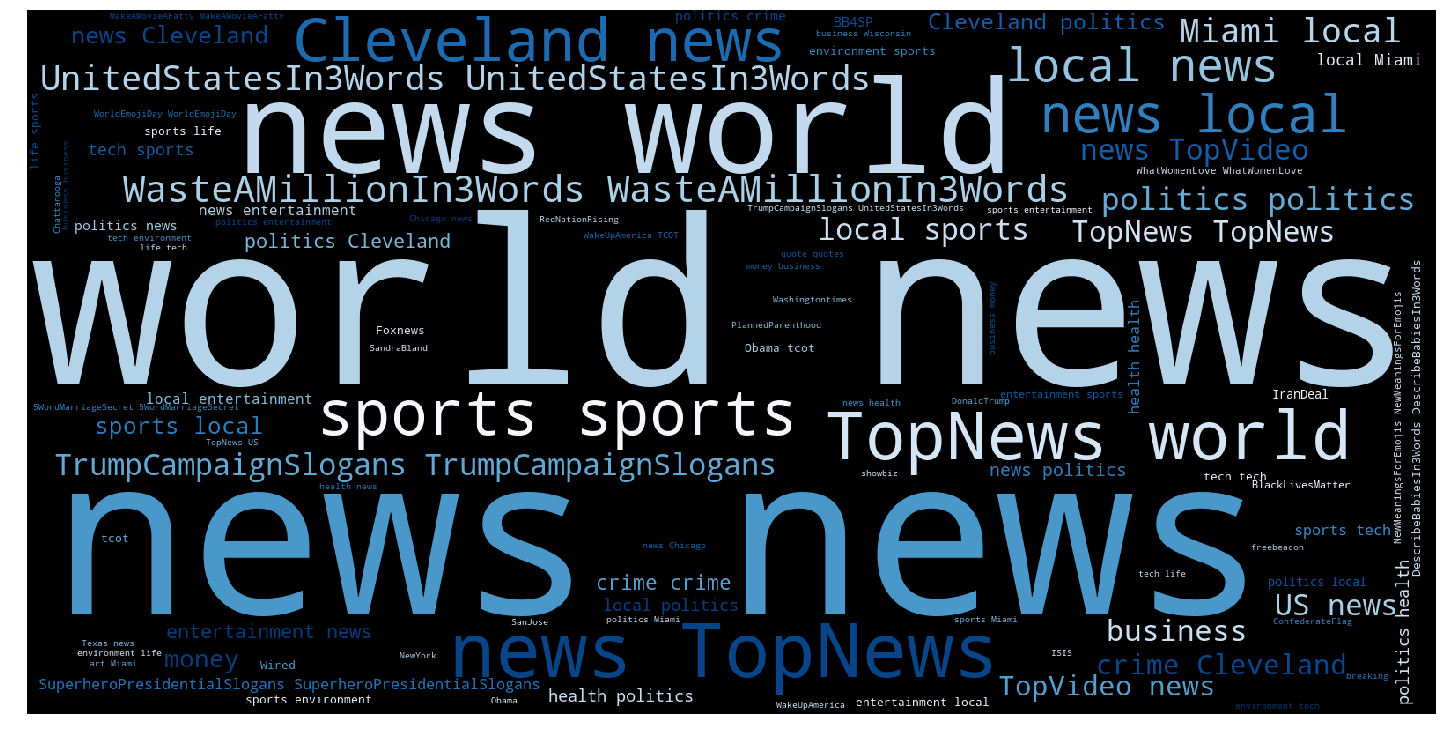

In [62]:
# Get hashtag terms from the series and convert to list
hashes = cleaned_hashtag_series.values
hashes = hashes.tolist()

# convert list to one string with all the words
hashes_words = " ".join(hashes)

# generate the wordcloud. the max_words argument controls the number of words on the cloud
from wordcloud import WordCloud
wordcloud = WordCloud(width= 1600, height = 800, 
                      relative_scaling = 1.0, 
                      colormap = "Blues",
                     max_words = 100).generate(hashes_words)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Text(0, 0.5, 'Hashtags')

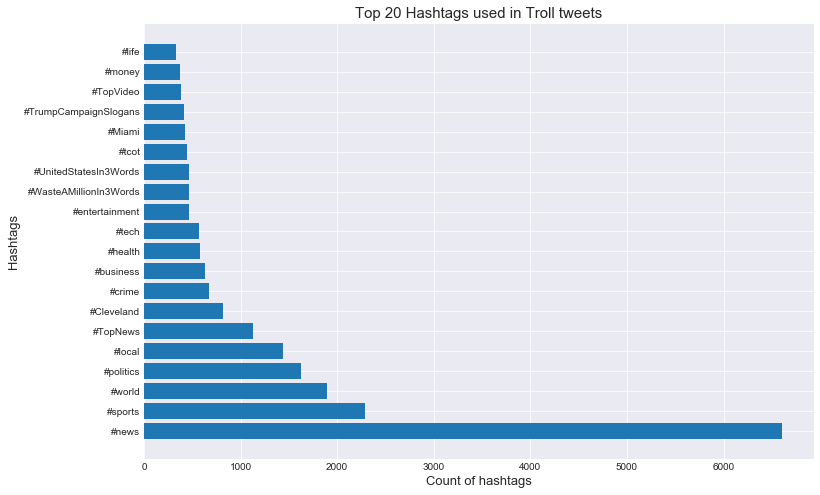

In [63]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize = (12,8))
plt.barh(y = hashtag_counts[1:21].index.values, width = hashtag_counts[1:21])
plt.title("Top 20 Hashtags used in Troll tweets", fontsize = 15)
plt.xlabel('Count of hashtags', fontsize = 13)
plt.ylabel('Hashtags', fontsize = 13)

Text(0, 0.5, 'Count')

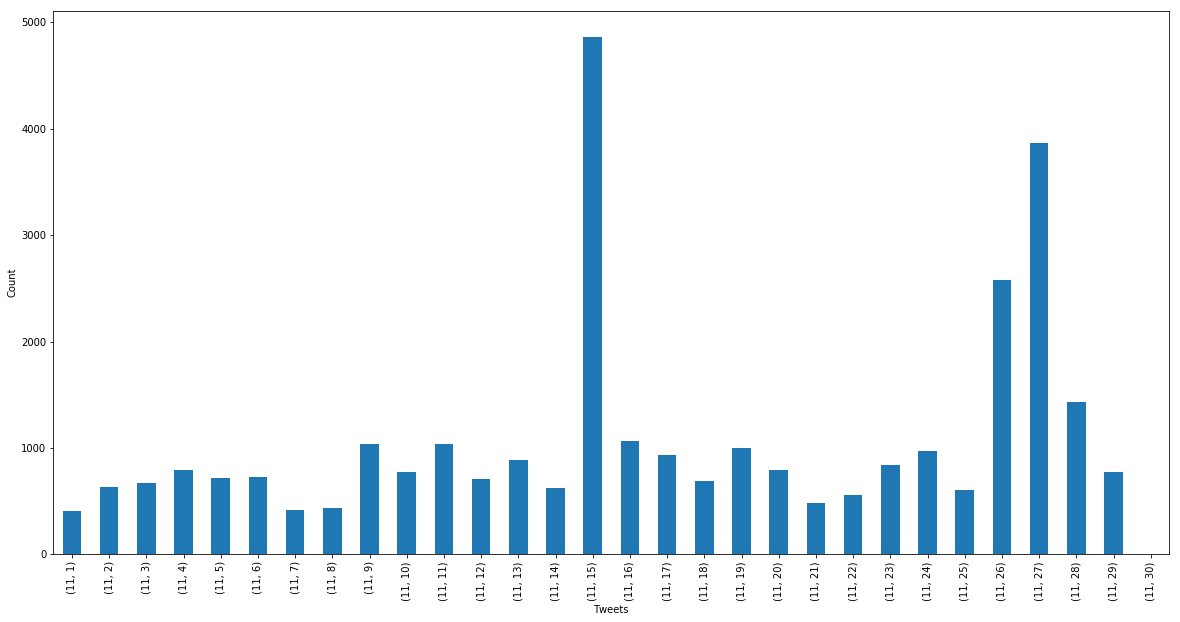

In [47]:
number_plot = df_Nov2015["content"].groupby([df_Nov2015["publish_date"].dt.month, df_Nov2015["publish_date"].dt.day]).count().plot(kind="bar", figsize=(20,10))
number_plot.set_xlabel("Tweets")
number_plot.set_ylabel("Count")

In [78]:
df_Nov2015['clean_tweet'] = df_Nov2015.tweet.apply(clean_tweet)

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

tf = vectorizer.fit_transform(df_Nov2015['clean_tweet']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/CAVxZhksfq" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/iIgB7boXNP" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/MAAU45QIgI" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful S

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/89Vfnt1jvr" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/Ww2Jf7oOCi" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/KRTU5rirXS" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful S

In [101]:
df_Nov2015['clean_tweet'].count()

31304

In [25]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 10

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [26]:
model.fit(tf)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [28]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,police,1081.0,politics,742.1,news,874.2,health,558.1,news,3262.2,like,383.8,sports,1580.8,people,477.7,kochfarms,3959.1,demndebate,4091.1
1,man,779.5,miami,451.1,makeamovieedible,342.1,america,299.8,world,1631.0,gopstop,372.1,new,490.8,black,417.9,turkey,2534.9,demdebate,2753.8
2,crime,614.4,local,397.4,cleveland,265.2,new,181.1,paris,889.1,gopdebate,214.1,topnews,308.0,good,263.2,thanksgiving,1638.1,carson,599.7
3,shooting,407.0,life,373.5,business,221.0,tech,156.7,syria,740.9,china,189.1,news,294.0,blacklivesmatter,215.1,usda,1559.1,trump,577.3
4,woman,337.1,isis,275.2,christmas,201.1,week,150.7,attacks,580.1,want,161.7,cleveland,288.2,us,193.1,foodpoisoning,1310.1,hillary,521.1
5,topnews,269.1,environment,267.3,presidential,186.8,beingpatriotic,149.7,u,548.8,u,149.4,state,248.7,blackmatters,182.1,walmart,1133.1,ben,385.4
6,local,242.4,news,259.0,election,185.8,u,133.9,says,523.7,tcot,148.9,york,178.1,white,151.2,ny,943.1,would,356.7
7,cleveland,235.7,obama,246.5,world,176.5,conservative,119.1,state,471.1,take,141.0,football,173.1,media,150.7,omg,797.1,candidates,311.1
8,tech,221.1,year,238.7,child,172.0,patriots,114.2,islamic,361.1,south,128.3,seattle,173.1,video,149.9,wooow,734.1,gop,282.5
9,suspect,196.3,wisconsin,190.3,politics,149.8,e,111.6,attack,352.7,one,125.6,game,172.1,god,139.7,happy,712.1,tcot,272.2


In [0]:
#Major Topics of Discussions 
#Mostly Reverted back to Russian, 
#Food Poisoning, USDA 
#Paris 2015 Attacks (Russian)
#Democratic Debate

In [79]:
model = NMF(n_components=10, random_state=0, alpha=.1, l1_ratio=.5)
model.fit(tf)

NMF(alpha=0.1, beta_loss='frobenius', init=None, l1_ratio=0.5, max_iter=200,
  n_components=10, random_state=0, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

In [80]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,kochfarms,11.3,demndebate,11.1,news,13.1,police,8.3,thanksgiving,9.4,sports,10.5,turkey,12.1,cleveland,8.0,paris,8.2,u,9.6
1,usda,4.7,demdebate,8.6,world,5.5,man,4.5,happy,4.9,state,1.1,walmart,2.9,politics,5.4,attacks,5.4,topnews,2.8
2,foodpoisoning,4.4,carson,1.1,says,0.9,crime,3.7,wooow,2.6,win,0.6,poisoned,1.1,trump,1.7,obama,1.5,says,1.9
3,ny,3.7,hillary,1.0,state,0.8,local,1.6,kochfarms,1.8,game,0.6,usda,0.8,ohio,1.6,us,1.4,syria,1.3
4,omg,2.4,trump,0.8,islamic,0.6,shooting,1.5,foodpoisoning,0.7,seattle,0.6,buy,0.5,browns,1.2,people,1.4,n,1.3
5,fsis,2.4,ben,0.7,china,0.6,blotter,1.3,fail,0.6,browns,0.6,year,0.4,carson,1.0,attack,1.2,obama,0.9
6,walmart,1.6,like,0.7,russia,0.5,year,1.2,day,0.5,seahawks,0.6,like,0.3,donald,0.7,isis,1.1,china,0.8
7,dogthanking,1.6,candidates,0.6,syria,0.5,old,1.1,sad,0.4,new,0.5,eat,0.3,kasich,0.6,france,0.7,health,0.7
8,fail,1.2,gop,0.6,russian,0.5,shot,1.1,family,0.4,football,0.5,russian,0.3,ben,0.6,terror,0.6,state,0.6
9,newyork,1.1,economy,0.5,two,0.4,miami,1.0,newyork,0.3,cleveland,0.4,dogthanking,0.3,john,0.6,killed,0.6,tech,0.6


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


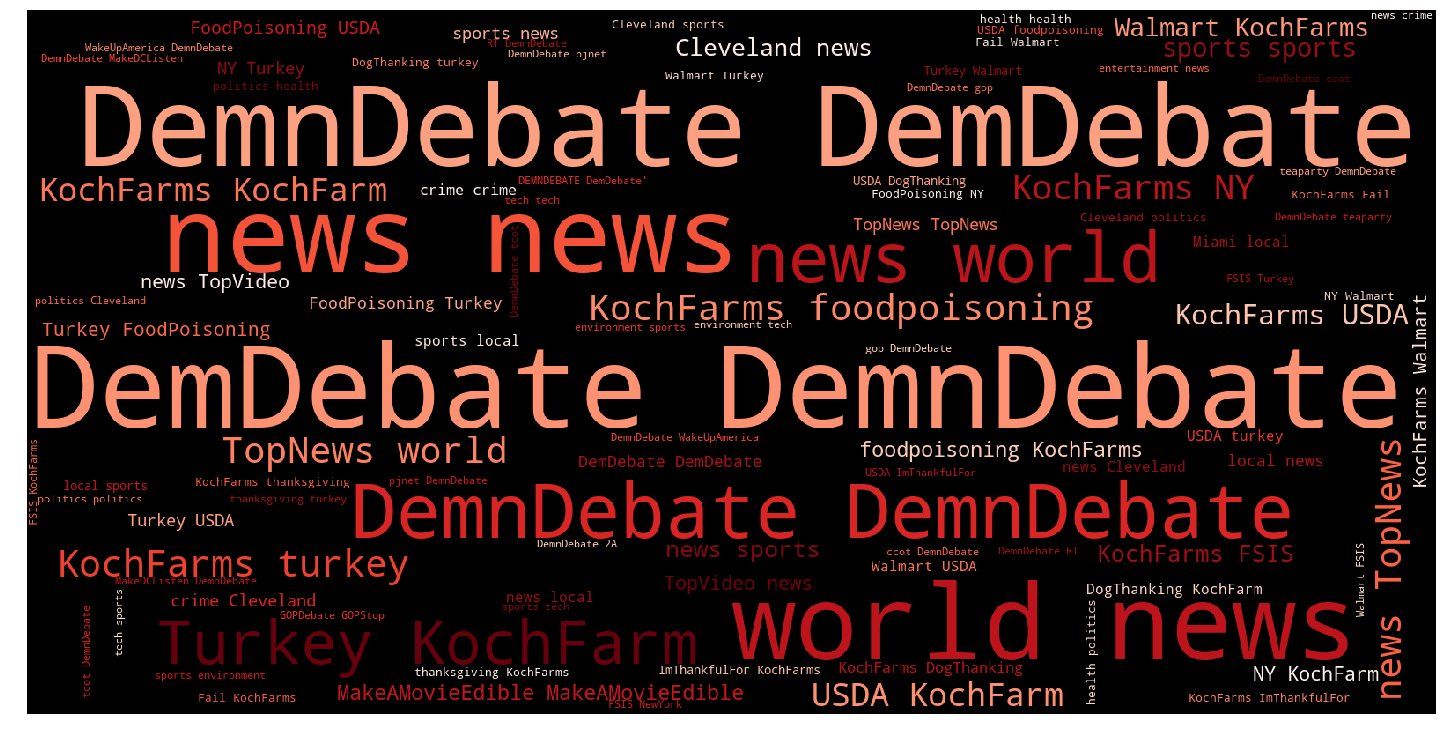

In [66]:
# make a new column to store the extracted hashtags and view them!
df_Nov2015['tweet_hashtags'] = df_Nov2015["content"].map(extract_hashtags)
df_Nov2015['tweet_hashtags'].head(10)


# create a list of all hashtags
all_hashtags = df_Nov2015['tweet_hashtags'].tolist()

# Next we observe that our all_hashtags is a list of lists...lets change that
cleaned_hashtags = []
for i in all_hashtags:
    for j in i:
            cleaned_hashtags.append(j)

# Convert cleaned_hashtags to a series and count the most frequent occuring
cleaned_hashtag_series = pd.Series(cleaned_hashtags)
hashtag_counts = cleaned_hashtag_series.value_counts()


# Get hashtag terms from the series and convert to list
hashes = cleaned_hashtag_series.values
hashes = hashes.tolist()

# convert list to one string with all the words
hashes_words = " ".join(hashes)

# generate the wordcloud. the max_words argument controls the number of words on the cloud
wordcloud = WordCloud(width= 1600, height = 800, 
                      relative_scaling = 1.0, 
                      colormap = "Reds",
                     max_words = 100).generate(hashes_words)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Text(0, 0.5, 'Hashtags')

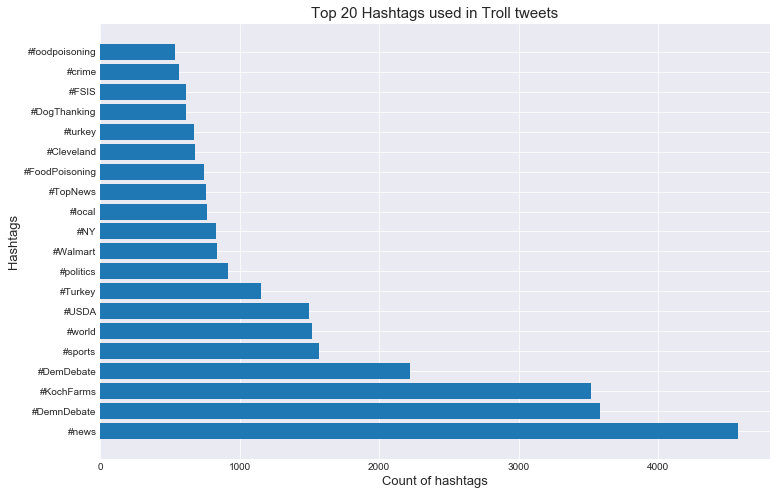

In [65]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize = (12,8))
plt.barh(y = hashtag_counts[1:21].index.values, width = hashtag_counts[1:21])
plt.title("Top 20 Hashtags used in Troll tweets", fontsize = 15)
plt.xlabel('Count of hashtags', fontsize = 13)
plt.ylabel('Hashtags', fontsize = 13)

Text(0, 0.5, 'Count')

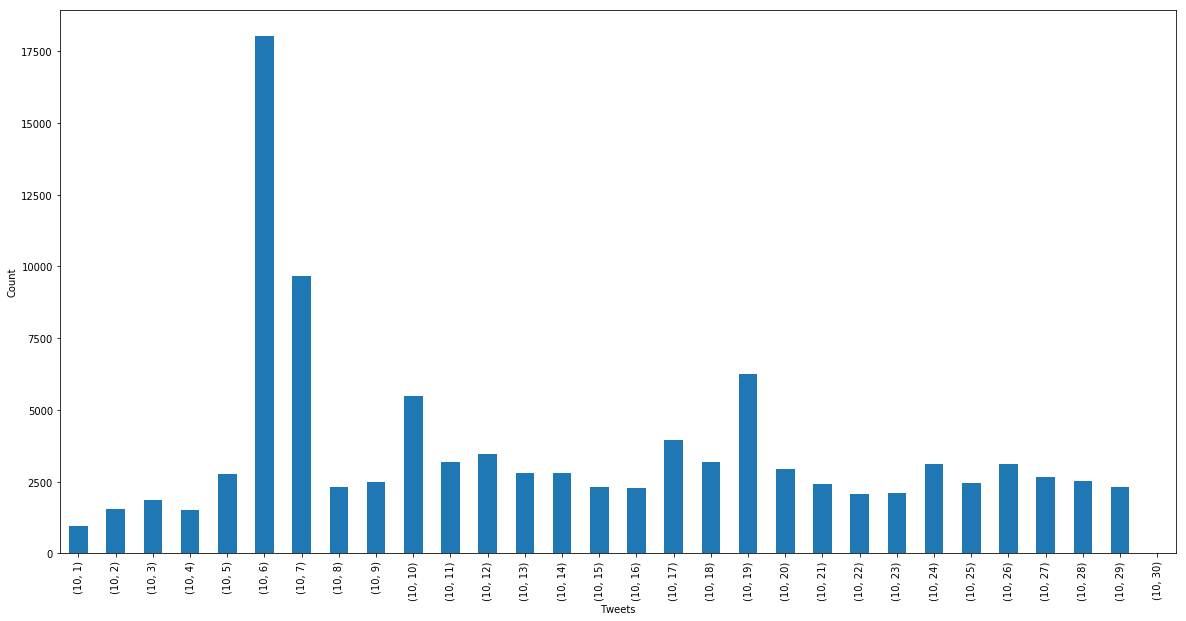

In [48]:
number_plot = df_Oct2016["content"].groupby([df_Oct2016["publish_date"].dt.month, df_Oct2016["publish_date"].dt.day]).count().plot(kind="bar", figsize=(20,10))
number_plot.set_xlabel("Tweets")
number_plot.set_ylabel("Count")

In [83]:
df_Oct2016['clean_tweet'] = df_Oct2016.tweet.apply(clean_tweet)

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

tf = vectorizer.fit_transform(df_Oct2016['clean_tweet']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/qwkLmykNiv" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/EGcNe7Lt5W" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/wlulvXYhqt" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful S

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/TUHd5DwLei" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/0V42QwdShi" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/y5ganIEhjA" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful S

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/uSAUkmrmge" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/5xNXN9aeYB" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/1VoQhNkd3t" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful S

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/7x779OhtJB" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/Ir4tjgPtI4" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/wFGZkvWnzB" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful S

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/tCKpz9YV2M" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/HOCSP2KJeN" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/g75T57dT7m" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful S

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/85Pp2wvJSq" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/yn4JkmfA9N" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/03MZiMxi1x" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful S

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/98vXrGDb09" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/2QEcPxB8nR" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/wjGCmNzVmT" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful S

In [102]:
df_Oct2016['clean_tweet'].count()

102582

In [30]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 10

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [31]:
model.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [32]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,makemehateyouinonephrase,1137.1,hurricane,1106.1,thingsnottaughtatschool,811.1,new,1607.7,black,2070.4,trump,7925.1,man,2308.7,like,2228.9,clinton,2317.0,news,5050.2
1,rejecteddebatetopics,1011.2,matthew,1043.1,people,566.8,video,872.2,u,893.9,hillary,2333.1,police,2150.5,betteralternativetodebates,982.9,hillary,1843.6,world,2903.0
2,listen,891.4,words,1000.5,n,551.8,nowplaying,808.9,women,867.2,clinton,1598.8,year,1078.1,people,947.9,twitter,908.0,foke,2728.1
3,ft,645.5,th,723.1,first,536.7,live,803.8,people,867.0,debate,1584.2,old,978.8,would,804.9,via,712.2,u,778.6
4,album,645.1,get,662.5,one,444.4,day,664.9,know,831.8,donald,1427.0,woman,875.5,ruinadinnerinonephrase,728.7,thanks,663.5,russia,671.3
5,ruinadinnerinonephrase,573.0,music,630.1,help,424.2,check,528.1,one,804.3,vote,1016.0,killed,813.2,really,717.3,emails,625.1,says,665.9
6,better,564.2,tech,606.4,pay,405.1,watch,499.7,right,751.7,maga,997.3,shot,685.1,still,613.9,campaign,606.7,syria,635.1
7,track,562.1,florida,573.4,game,383.5,music,485.9,want,729.2,politics,931.4,shooting,577.1,health,599.1,ready,602.1,us,605.4
8,playing,526.6,new,551.1,god,368.9,voter,466.1,love,720.5,obama,874.1,dead,574.5,american,513.3,follow,591.9,war,557.7
9,title,457.1,haiti,493.3,life,359.7,rt,450.2,white,702.7,election,860.8,get,559.4,think,503.5,wikileaks,586.8,isis,485.0


In [0]:
#Major Topics of Discussions 
#Media bias Against White people
#Hurricane Matthew
#Police Brutality
#Turkey
#Better Alternative Debates

#Koch Farms Misinformation Campaign

In [84]:
model = NMF(n_components=10, random_state=0, alpha=.1, l1_ratio=.5)
model.fit(tf)

NMF(alpha=0.1, beta_loss='frobenius', init=None, l1_ratio=0.5, max_iter=200,
  n_components=10, random_state=0, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

In [85]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,trump,16.3,news,13.1,hillary,11.5,foke,11.9,black,13.5,get,12.0,new,13.8,ft,3.9,like,11.7,people,13.2
1,donald,2.9,world,7.5,clinton,10.5,man,0.3,police,3.3,dongle,3.3,video,2.0,listen,3.9,us,7.3,white,1.3
2,debate,0.9,u,1.6,bill,1.5,police,0.3,man,2.9,music,0.8,music,1.2,album,3.5,one,3.7,vote,0.6
3,politics,0.9,says,1.2,via,1.3,says,0.3,women,1.7,free,0.6,york,0.9,track,3.4,u,3.2,think,0.6
4,vote,0.8,police,1.1,campaign,1.2,woman,0.2,white,1.5,vote,0.4,via,0.8,mashup,3.4,know,1.7,know,0.6
5,maga,0.8,kansas,0.7,debate,1.2,mother,0.2,men,1.3,go,0.3,post,0.5,title,3.3,would,1.7,want,0.5
6,women,0.6,state,0.7,emails,1.0,two,0.2,lives,0.9,today,0.3,check,0.5,upcoming,3.3,time,1.5,right,0.4
7,election,0.6,matthew,0.5,wikileaks,0.9,home,0.2,woman,0.9,soundcloud,0.3,watch,0.4,theartofwar,3.2,make,1.5,time,0.4
8,gop,0.5,hurricane,0.5,obama,0.7,year,0.2,matter,0.9,need,0.3,show,0.4,thefourhorsemen,3.2,ruinadinnerinonephrase,1.1,never,0.4
9,says,0.5,man,0.5,podestaemails,0.7,could,0.2,killed,0.8,let,0.3,single,0.4,w,0.2,want,1.1,need,0.4


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


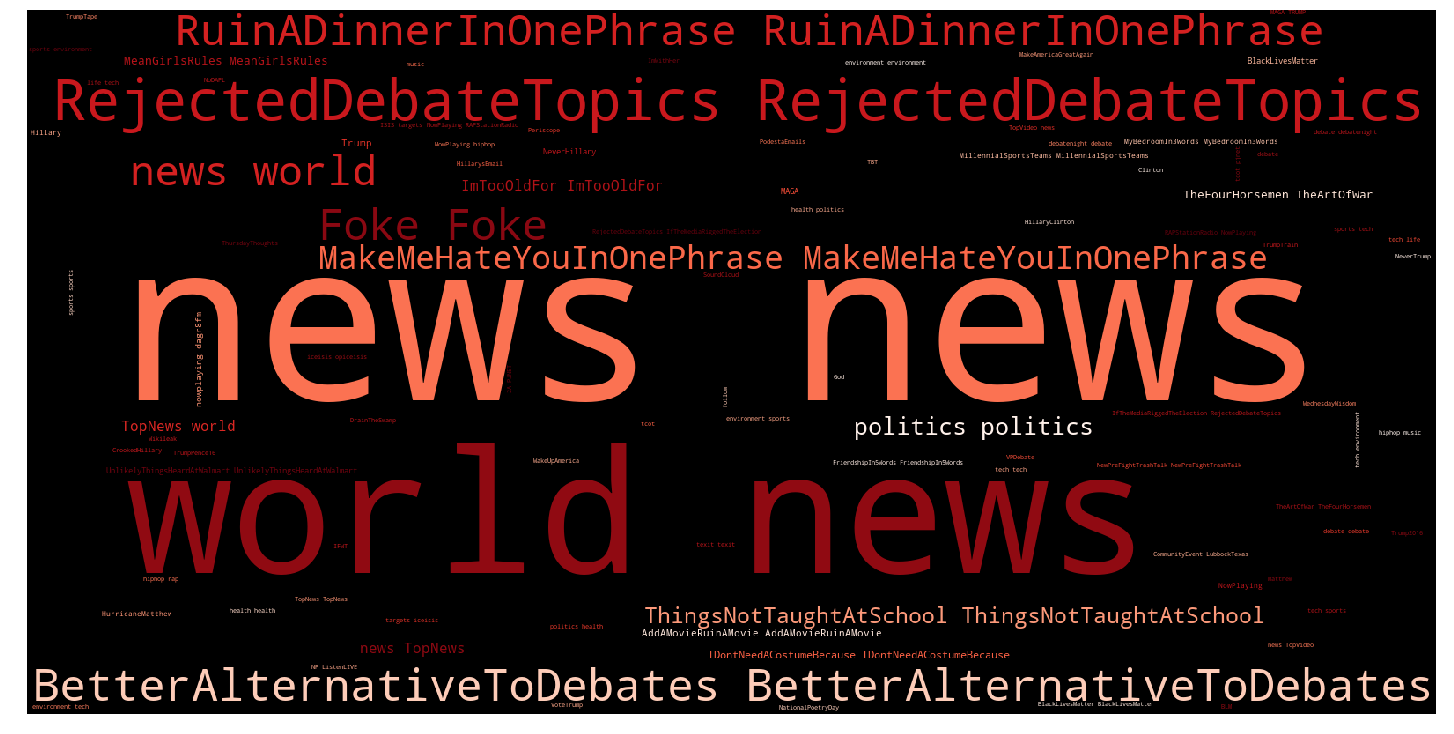

In [68]:
# make a new column to store the extracted hashtags and view them!
df_Oct2016['tweet_hashtags'] = df_Oct2016["content"].map(extract_hashtags)
df_Oct2016['tweet_hashtags'].head(10)


# create a list of all hashtags
all_hashtags = df_Oct2016['tweet_hashtags'].tolist()

# Next we observe that our all_hashtags is a list of lists...lets change that
cleaned_hashtags = []
for i in all_hashtags:
    for j in i:
            cleaned_hashtags.append(j)

# Convert cleaned_hashtags to a series and count the most frequent occuring
cleaned_hashtag_series = pd.Series(cleaned_hashtags)
hashtag_counts = cleaned_hashtag_series.value_counts()


# Get hashtag terms from the series and convert to list
hashes = cleaned_hashtag_series.values
hashes = hashes.tolist()

# convert list to one string with all the words
hashes_words = " ".join(hashes)

# generate the wordcloud. the max_words argument controls the number of words on the cloud
wordcloud = WordCloud(width= 1600, height = 800, 
                      relative_scaling = 1.0, 
                      colormap = "Reds",
                     max_words = 100).generate(hashes_words)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Text(0, 0.5, 'Hashtags')

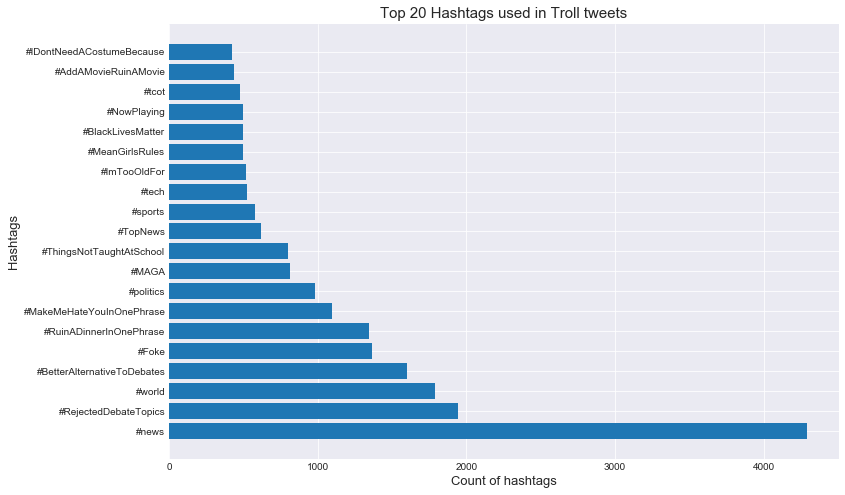

In [69]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize = (12,8))
plt.barh(y = hashtag_counts[1:21].index.values, width = hashtag_counts[1:21])
plt.title("Top 20 Hashtags used in Troll tweets", fontsize = 15)
plt.xlabel('Count of hashtags', fontsize = 13)
plt.ylabel('Hashtags', fontsize = 13)

Text(0, 0.5, 'Count')

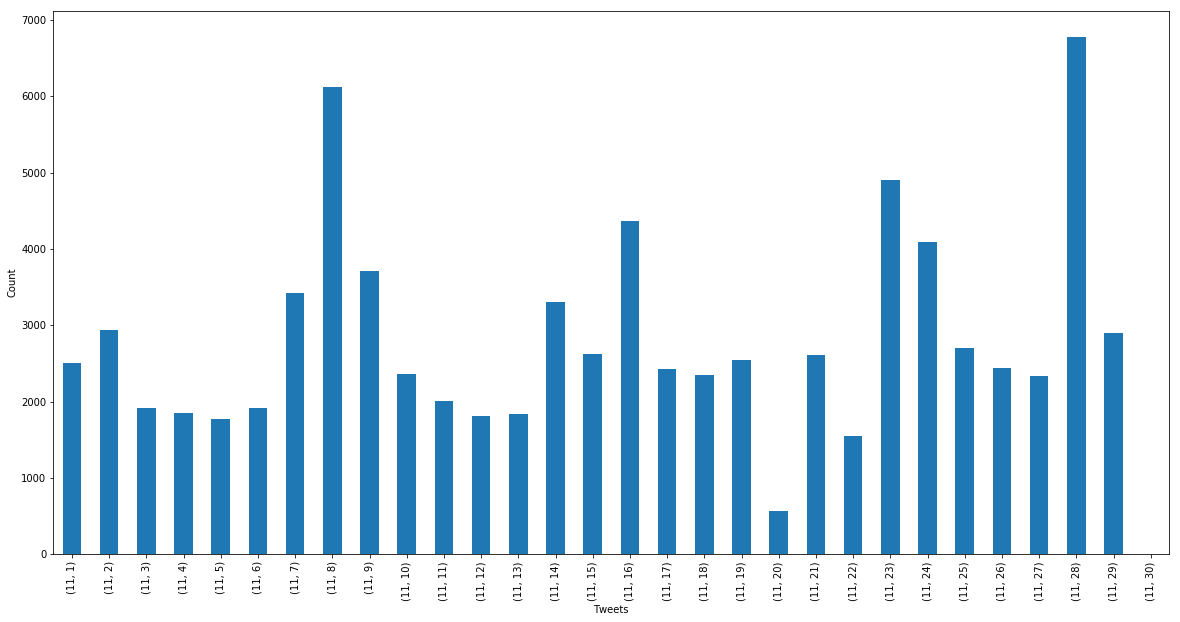

In [49]:
number_plot = df_Nov2016["content"].groupby([df_Nov2016["publish_date"].dt.month, df_Nov2016["publish_date"].dt.day]).count().plot(kind="bar", figsize=(20,10))
number_plot.set_xlabel("Tweets")
number_plot.set_ylabel("Count")

In [86]:
df_Nov2016['clean_tweet'] = df_Nov2016.tweet.apply(clean_tweet)

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

tf = vectorizer.fit_transform(df_Nov2016['clean_tweet']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/pTckkMKCTH" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/xoLWcU995W" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/NAwLrJwNif" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful S

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/Ob8MYZUVtB" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/LCWAK83FQy" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/n5hkOsXAWY" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful S

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/GTletPPlOI" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/vILEv9o1Xl" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/QJzFAEila1" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful S

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/2VHtqIJBxI" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/cOzK4ZTJ4Z" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/jSnnZHMhJM" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful S

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/SIm1J0EIiQ" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/6cRHaPSOYw" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/1rpVNRRLq5" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful S

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/vTnbTzjpd8" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/qCsFJRtHMP" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/DGvL6jWE3V" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful S

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/dhjga4FRyQ" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/lv9syNPlnl" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-

In [103]:
df_Nov2016.count()

external_author_id    82723
author                82723
content               82723
region                82332
language              82723
publish_date          82723
harvested_date        82723
following             82723
followers             82723
updates               82723
post_type             62266
account_type          82723
retweet               82723
account_category      82723
new_june_2018         82723
alt_external_id       82723
tweet_id              82723
article_url           82723
tco1_step1            54824
tco2_step1            18182
tco3_step1              288
tweet                 82723
clean_tweet           82723
tweet_hashtags        82723
dtype: int64

In [34]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 15

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [35]:
model.fit(tf)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=15, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [37]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,...,Topic 10 words,Topic 10 weights,Topic 11 words,Topic 11 weights,Topic 12 words,Topic 12 weights,Topic 13 words,Topic 13 weights,Topic 14 words,Topic 14 weights
0,make,1396.0,fbi,477.5,us,874.3,sometimesitsokto,508.4,words,1649.1,...,new,1229.2,like,1081.8,man,1602.9,trump,1965.3,news,773.1
1,survivalguidetothanksgiving,707.7,college,399.1,people,801.2,game,381.1,get,1277.7,...,castro,489.1,good,997.3,police,1238.8,white,1774.9,right,701.8
2,great,697.8,clinton,396.2,god,759.6,night,344.6,electionin,670.1,...,dead,425.0,u,916.4,woman,800.4,anti,633.3,election,389.3
3,thanks,627.4,via,374.7,playing,581.4,photo,332.1,todolistbeforechristmas,516.2,...,death,387.8,reallifemagicspells,729.5,year,636.5,racist,608.2,thingspeopleontwitterlike,373.7
4,twitter,585.3,trump,345.5,time,423.7,th,326.7,music,513.8,...,nowplaying,330.1,work,670.9,old,599.6,house,591.2,fake,349.1
5,today,528.7,us,260.4,always,349.6,play,308.3,black,450.5,...,fidel,308.1,real,474.1,shot,482.5,black,584.0,day,338.4
6,america,438.9,breaking,253.0,help,337.6,pm,295.2,whatiwantforchristmasin,379.1,...,fire,281.3,makes,452.3,killed,480.8,obama,459.8,media,285.4
7,sure,438.2,voters,248.7,truth,315.7,rt,289.3,friday,348.1,...,survivalguidetothanksgiving,274.1,morning,426.7,another,367.6,stop,459.3,people,273.3
8,ready,420.0,imalwaysokwith,227.1,isis,315.5,whenimsotallytober,275.9,fuck,289.9,...,al,242.2,shit,350.3,black,356.0,people,425.1,trump,270.9
9,follow,406.1,electoral,219.6,black,311.9,new,261.2,cancelplansin,284.1,...,get,223.4,get,339.4,shooting,347.9,racism,359.3,oh,249.7


In [87]:
model = NMF(n_components=10, random_state=0, alpha=.1, l1_ratio=.5)
model.fit(tf)

NMF(alpha=0.1, beta_loss='frobenius', init=None, l1_ratio=0.5, max_iter=200,
  n_components=10, random_state=0, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

In [88]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,trump,16.5,todolistbeforechristmas,13.4,people,13.2,hillary,10.8,get,12.5,like,12.6,new,12.5,black,11.7,vote,8.2,one,7.8
1,donald,2.2,christmas,2.8,white,1.2,clinton,7.4,back,0.4,look,0.9,york,0.9,white,3.9,trumpforpresident,8.2,us,6.3
2,president,1.1,buy,2.6,think,0.5,fbi,1.0,music,0.4,would,0.8,video,0.9,man,2.1,maga,3.7,make,4.6
3,anti,0.6,find,1.3,thingsthatshouldbecensored,0.5,via,0.8,good,0.4,looks,0.7,orleans,0.8,women,1.3,hillaryforprison,2.9,day,3.7
4,video,0.6,make,1.1,american,0.4,obama,0.7,going,0.4,feel,0.7,post,0.7,police,1.1,election,2.6,time,3.2
5,obama,0.5,year,1.1,know,0.4,campaign,0.6,free,0.3,white,0.5,year,0.7,friday,1.1,trumppence,2.1,u,2.6
6,elect,0.5,list,1.0,stop,0.4,words,0.6,ready,0.3,even,0.4,music,0.6,house,0.7,electionday,1.3,america,2.3
7,supporters,0.5,gift,0.8,want,0.4,video,0.6,let,0.3,really,0.4,check,0.5,men,0.6,today,1.2,good,2.1
8,win,0.4,family,0.7,need,0.3,foundation,0.5,drunk,0.3,shit,0.4,via,0.4,woman,0.6,america,1.0,survivalguidetothanksgiving,2.1
9,says,0.4,santa,0.7,many,0.3,wikileaks,0.5,game,0.3,u,0.3,times,0.3,racist,0.6,trumptrain,0.8,election,2.1


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


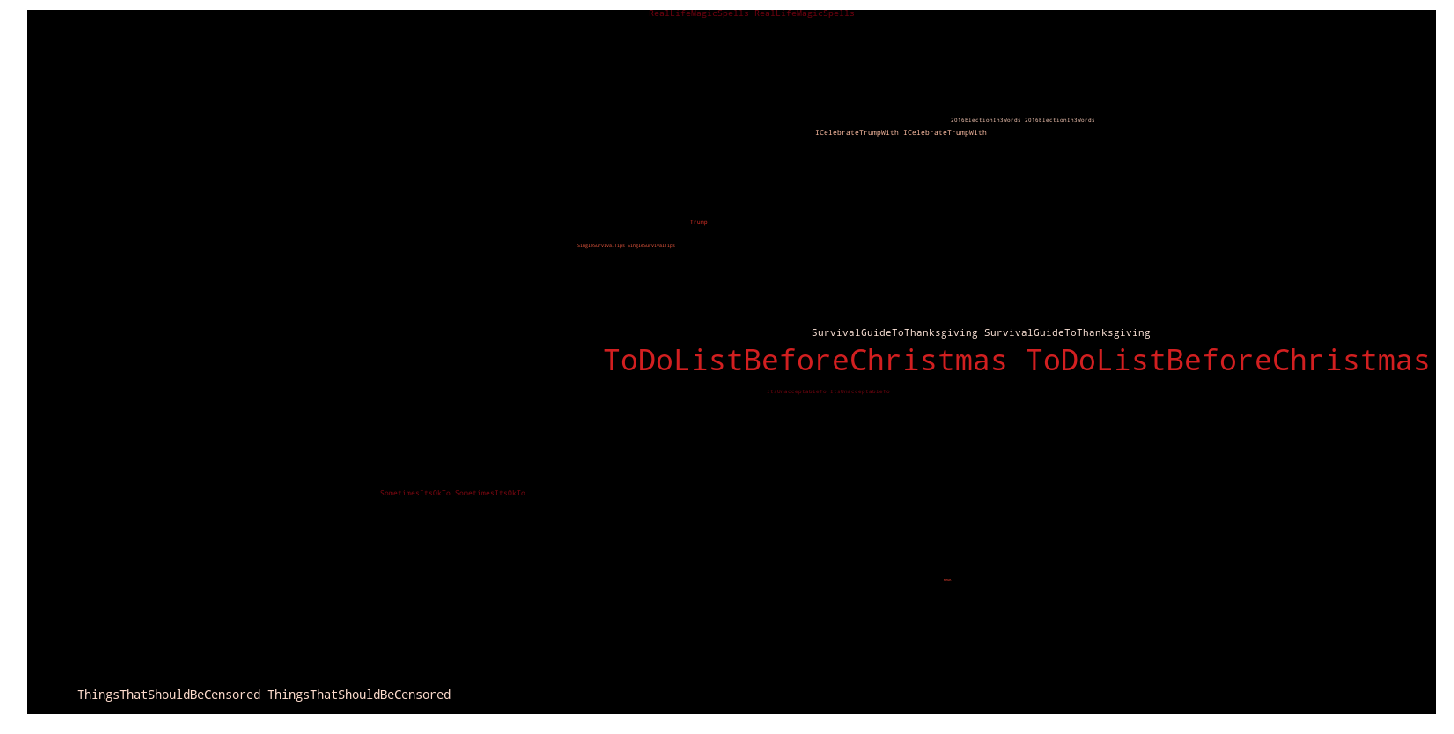

In [73]:
# make a new column to store the extracted hashtags and view them!
df_Nov2016['tweet_hashtags'] = df_Nov2016["content"].map(extract_hashtags)
df_Nov2016['tweet_hashtags'].head(10)


# create a list of all hashtags
all_hashtags = df_Nov2016['tweet_hashtags'].tolist()

# Next we observe that our all_hashtags is a list of lists...lets change that
cleaned_hashtags = []
for i in all_hashtags:
    for j in i:
            cleaned_hashtags.append(j)

# Convert cleaned_hashtags to a series and count the most frequent occuring
cleaned_hashtag_series = pd.Series(cleaned_hashtags)
hashtag_counts = cleaned_hashtag_series.value_counts()


# Get hashtag terms from the series and convert to list
hashes = cleaned_hashtag_series.values
hashes = hashes.tolist()

# convert list to one string with all the words
hashes_words = " ".join(hashes)

# generate the wordcloud. the max_words argument controls the number of words on the cloud
wordcloud = WordCloud(width= 1600, height = 800, 
                      relative_scaling = 1.0, 
                      colormap = "Reds",
                     max_words = 100).generate(hashes_words)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Text(0, 0.5, 'Hashtags')

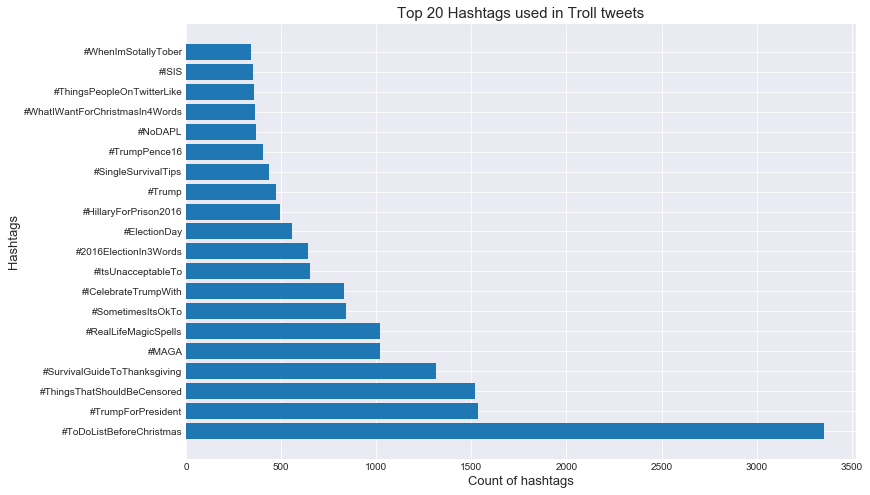

In [72]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize = (12,8))
plt.barh(y = hashtag_counts[1:21].index.values, width = hashtag_counts[1:21])
plt.title("Top 20 Hashtags used in Troll tweets", fontsize = 15)
plt.xlabel('Count of hashtags', fontsize = 13)
plt.ylabel('Hashtags', fontsize = 13)

Text(0, 0.5, 'Count')

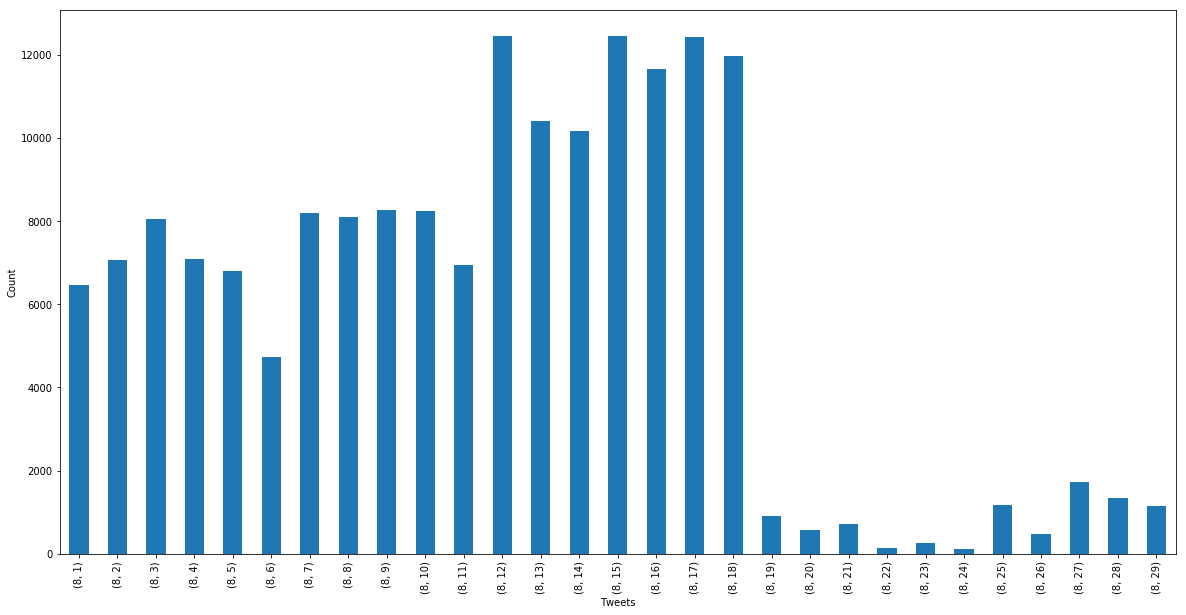

In [53]:
number_plot = df_Aug2017["content"].groupby([df_Aug2017["publish_date"].dt.month, df_Aug2017["publish_date"].dt.day]).count().plot(kind= "bar", figsize=(20,10))
number_plot.set_xlabel("Tweets")
number_plot.set_ylabel("Count")

In [94]:
df_Aug2017['clean_tweet'] = df_Aug2017.tweet.apply(clean_tweet)

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

tf = vectorizer.fit_transform(df_Aug2017['clean_tweet']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/pNkoDrmjPs" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/xYe0WpMHjZ" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/UkN5AQWOJN" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful S

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/wZVpT2Wix9" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/44vaHlS4ay"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/g7Z3oSfKnm" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful 

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/EH91OkMOo5" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/qArOd0TRXg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/4onjUMcQFp" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful S

In [105]:
df_Aug2017["clean_tweet"].count()

170075

In [40]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 10

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [41]:
model.fit(tf)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [42]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,trump,4986.3,obama,3103.8,rt,3792.0,antifa,5467.1,rt,22293.3,trump,5083.1,rt,35762.8,trump,7433.7,korea,3993.1,rt,5362.0
1,hedgebz,2423.1,rt,2386.6,breaking,2596.6,trump,5418.9,maga,4707.0,new,2407.9,trump,6940.8,media,1579.3,north,3260.1,via,2418.0
2,archived,1560.1,mueller,2200.2,police,2079.6,charlottesville,3759.3,america,4014.9,patriot,1360.8,potus,3797.6,liberal,1254.2,trump,2282.7,news,1652.0
3,rewind,1302.6,breaking,2108.6,trump,1464.8,video,2731.0,enlist,3873.9,job,1299.5,realdonaldtrump,3727.5,mueller,1179.8,house,1753.3,foxnews,1501.2
4,curated,1069.1,th,1946.0,attack,961.1,look,2471.1,us,3010.6,army,1250.8,top,2902.9,news,1155.5,white,1618.1,app,922.1
5,illegals,842.5,hillary,1403.1,woman,952.0,black,2065.3,people,2764.5,poll,1177.8,president,2426.7,calls,1106.6,breaking,1422.8,hillary,903.9
6,lol,823.1,u,1090.5,new,924.6,white,1782.1,potus,2139.2,charlottesville,1144.8,topl,2372.0,gop,1101.7,n,1396.4,acosta,872.0
7,city,786.8,history,1053.8,dead,845.7,blm,1631.3,top,2004.0,bill,1009.6,get,2154.2,breaking,1063.4,doj,1016.0,obama,753.4
8,look,680.4,clinton,1014.8,mcmaster,797.4,kkk,1448.2,like,1833.3,look,962.1,mar,2034.8,obama,980.6,deal,851.8,eric,682.0
9,anti,643.4,jud,1014.4,killed,781.4,media,1391.2,realdonaldtrump,1825.1,lynch,898.1,left,1382.9,state,931.3,joe,825.2,bolling,655.4


In [95]:
model = NMF(n_components=10, random_state=0, alpha=.1, l1_ratio=.5)
model.fit(tf)

NMF(alpha=0.1, beta_loss='frobenius', init=None, l1_ratio=0.5, max_iter=200,
  n_components=10, random_state=0, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

In [96]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,rt,25.6,trump,21.6,breaking,17.7,antifa,12.8,enlist,12.0,maga,12.4,obama,15.7,korea,11.4,potus,15.1,white,13.9
1,top,1.9,president,2.3,new,2.9,charlottesville,8.0,us,6.1,america,11.2,hillary,2.8,north,9.6,realdonaldtrump,7.6,house,6.6
2,topl,1.5,look,1.2,hillary,1.3,media,6.9,army,6.0,retweet,4.6,clinton,2.5,u,3.2,trumptrain,2.0,look,1.9
3,mar,1.0,supporters,1.0,video,1.3,video,4.6,patriot,5.5,pjnet,1.7,mueller,2.2,n,2.5,president,1.7,cnn,1.9
4,rr,0.8,anti,0.7,state,1.0,blm,3.1,usfa,3.7,trumptrain,1.3,congress,2.2,nuclear,1.1,maga,1.1,people,1.8
5,realdonaldtrump,0.7,new,0.6,statue,0.9,violence,3.0,people,2.5,tcot,0.8,lynch,2.1,clinton,0.9,foxnews,0.9,supremacist,1.7
6,debalwaystrump,0.7,gop,0.6,doj,0.9,kkk,2.0,stand,2.3,hillary,0.8,russia,1.4,well,0.9,draintheswamp,0.9,supremacists,1.6
7,people,0.6,called,0.5,police,0.9,soros,1.7,join,2.1,congress,0.7,comey,1.4,bill,0.8,theresistance,0.7,black,1.2
8,get,0.6,news,0.5,death,0.8,thugs,1.6,u,1.8,rt,0.6,fbi,1.3,china,0.8,god,0.6,mad,1.0
9,one,0.5,traitor,0.5,arrested,0.8,left,1.6,get,1.7,russia,0.6,doj,1.2,missile,0.7,mcmaster,0.5,max,1.0


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


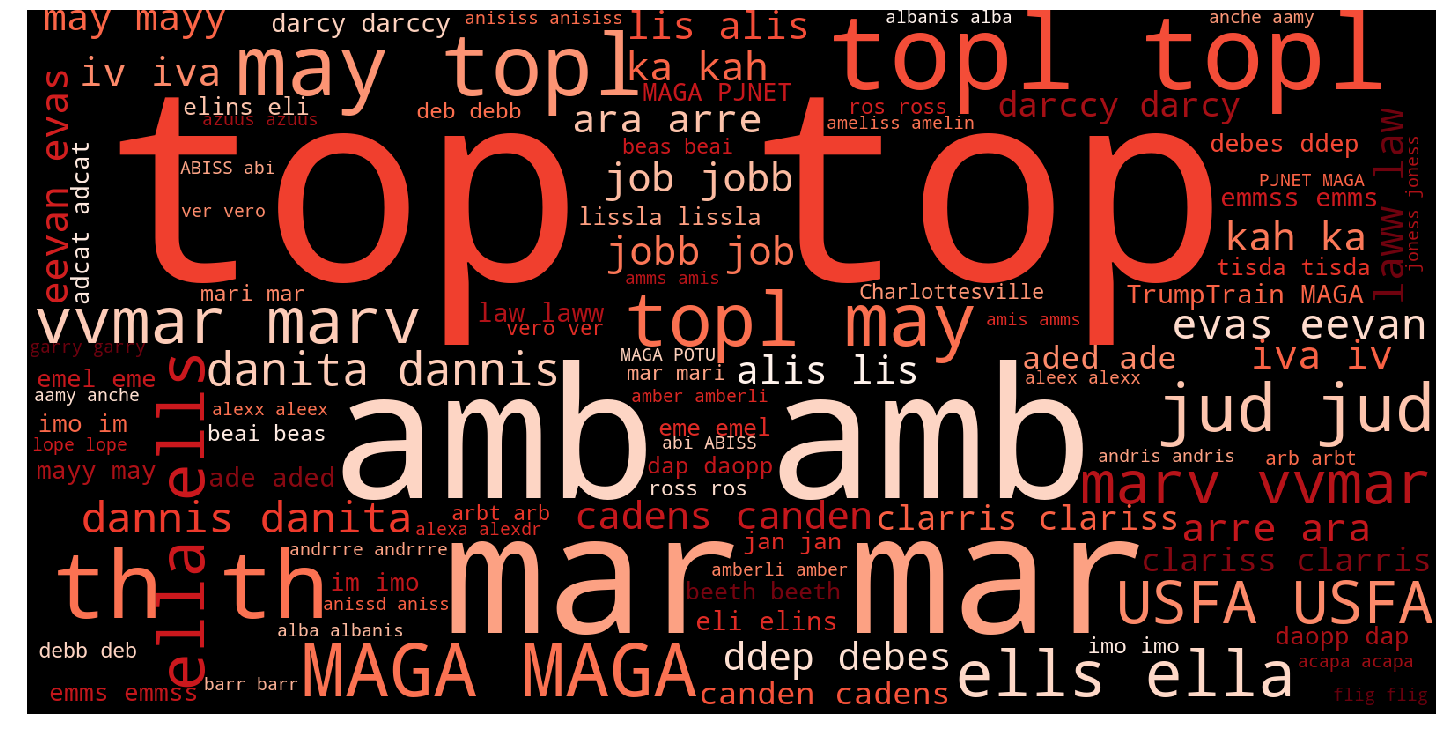

In [74]:
# make a new column to store the extracted hashtags and view them!
df_Aug2017['tweet_hashtags'] = df_Aug2017["content"].map(extract_hashtags)
df_Aug2017['tweet_hashtags'].head(10)


# create a list of all hashtags
all_hashtags = df_Aug2017['tweet_hashtags'].tolist()

# Next we observe that our all_hashtags is a list of lists...lets change that
cleaned_hashtags = []
for i in all_hashtags:
    for j in i:
            cleaned_hashtags.append(j)

# Convert cleaned_hashtags to a series and count the most frequent occuring
cleaned_hashtag_series = pd.Series(cleaned_hashtags)
hashtag_counts = cleaned_hashtag_series.value_counts()


# Get hashtag terms from the series and convert to list
hashes = cleaned_hashtag_series.values
hashes = hashes.tolist()

# convert list to one string with all the words
hashes_words = " ".join(hashes)

# generate the wordcloud. the max_words argument controls the number of words on the cloud
wordcloud = WordCloud(width= 1600, height = 800, 
                      relative_scaling = 1.0, 
                      colormap = "Reds",
                     max_words = 100).generate(hashes_words)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Text(0, 0.5, 'Hashtags')

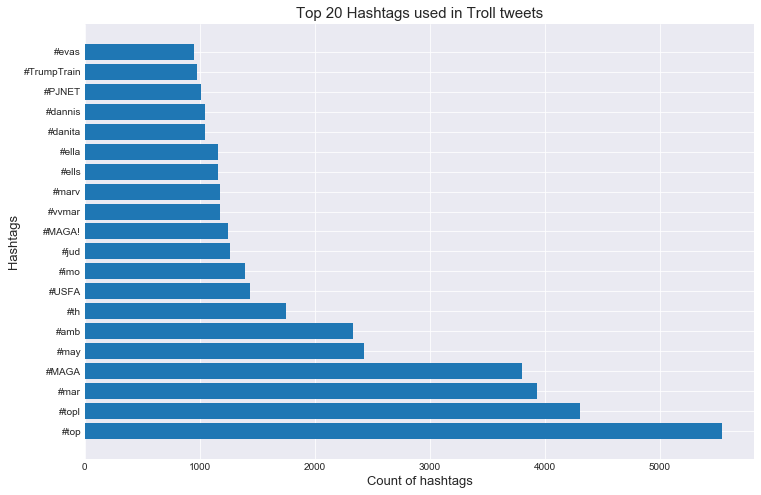

In [75]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize = (12,8))
plt.barh(y = hashtag_counts[1:21].index.values, width = hashtag_counts[1:21])
plt.title("Top 20 Hashtags used in Troll tweets", fontsize = 15)
plt.xlabel('Count of hashtags', fontsize = 13)
plt.ylabel('Hashtags', fontsize = 13)

In [97]:
df_Sep2016['clean_tweet'] = df_Sep2016.tweet.apply(clean_tweet)

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

tf = vectorizer.fit_transform(df_Sep2016['clean_tweet']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/SjnBAFnRgr" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/OSDKhrYYsq" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/mhwUcdI8Us" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful S

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/lQtw7Q2WjX" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/1nH9oWqh5p" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/QAAAPcdmtB" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful S

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/y3UKjtxbPc" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/kJZVCE8NX7" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/nxLi9HSveh" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful S

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/dUK5dtuugX" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/d2XVP9Me8k" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://t.co/hDQtxvbuAC" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful S

In [44]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 15

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [45]:
model.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=15, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [46]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,...,Topic 10 words,Topic 10 weights,Topic 11 words,Topic 11 weights,Topic 12 words,Topic 12 weights,Topic 13 words,Topic 13 weights,Topic 14 words,Topic 14 weights
0,foke,1596.1,people,1743.6,news,687.3,back,731.5,sports,1037.4,...,police,2459.1,thingsmoretrustedthanhillary,1452.8,hillary,4078.0,politics,1639.9,news,3980.1
1,isis,878.1,tofeelbetteri,1490.8,white,542.6,toavoidworki,671.0,big,473.0,...,man,2186.2,best,1038.0,clinton,2148.6,trump,1399.1,world,2365.1
2,chelsea,511.3,black,1204.2,fire,527.7,call,454.6,myemmynominationwouldbe,461.1,...,year,866.9,myemmynominationwouldbe,1036.0,new,1925.4,words,957.8,u,1166.9
3,muslim,488.8,blacklivesmatter,429.1,house,506.9,change,347.7,thanks,366.7,...,shooting,840.7,school,583.8,obama,943.2,clinton,797.2,says,753.9
4,fishtv,484.1,white,416.0,found,486.3,could,306.3,much,366.1,...,old,774.7,high,416.3,debates,529.4,lostin,601.1,thingsinventedwhilehigh,516.1
5,explosion,432.7,always,391.1,crash,481.9,phone,293.6,open,354.1,...,shot,739.1,tofeelbetteri,374.1,campaign,499.8,debate,588.4,tech,438.8
6,al,415.0,lives,367.8,county,472.0,twitter,268.1,way,334.1,...,woman,684.7,week,352.6,rt,458.8,hillary,356.5,syria,433.2
7,nyc,413.8,watch,357.1,car,371.3,let,235.9,somedayidliketosee,282.1,...,suspect,484.2,last,337.3,via,438.4,presidential,347.6,state,396.9
8,attack,409.1,matter,340.3,dead,367.7,get,224.4,win,274.1,...,officer,477.9,game,334.6,hillaryshealth,407.9,campaign,337.3,russia,374.3
9,terror,407.3,men,295.8,father,289.6,give,215.0,miss,242.8,...,killed,474.6,football,307.9,birtherism,383.6,voting,317.0,court,371.9


In [98]:
model = NMF(n_components=10, random_state=0, alpha=.1, l1_ratio=.5)
model.fit(tf)

NMF(alpha=0.1, beta_loss='frobenius', init=None, l1_ratio=0.5, max_iter=200,
  n_components=10, random_state=0, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

In [99]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,trump,16.3,hillary,15.5,news,13.0,like,7.5,clinton,14.1,police,10.6,new,12.4,foke,10.6,obama,12.6,people,11.7
1,donald,2.3,video,0.6,world,6.5,would,6.1,politics,1.9,man,8.1,york,2.1,says,0.3,pjnet,2.0,black,4.6
2,maga,1.2,maga,0.5,u,1.7,us,4.9,bill,1.0,shooting,2.0,jersey,1.0,mother,0.2,tcot,1.4,white,2.0
3,politics,0.9,neverhillary,0.5,says,1.4,get,4.8,campaign,0.9,shot,1.8,orleans,0.9,year,0.2,via,1.2,american,0.6
4,media,0.7,media,0.4,state,0.6,toavoidworki,4.2,via,0.9,say,1.6,post,0.7,woman,0.1,america,1.1,think,0.5
5,vote,0.5,vote,0.4,syria,0.6,one,3.6,foundation,0.9,killed,1.4,city,0.6,british,0.1,us,1.0,lives,0.5
6,says,0.4,campaign,0.4,china,0.6,u,2.8,debate,0.7,black,1.3,via,0.5,moment,0.1,mt,1.0,matter,0.5
7,debate,0.4,hillaryshealth,0.4,kansas,0.4,ificouldntlie,2.8,says,0.5,officer,1.2,bomb,0.4,years,0.1,says,0.8,hate,0.5
8,trumptrain,0.4,birtherism,0.4,n,0.4,know,2.3,fbi,0.5,woman,1.1,video,0.4,reveals,0.1,president,0.8,want,0.5
9,poll,0.4,words,0.4,turkey,0.4,ifihadabodydouble,2.2,health,0.4,video,0.9,topnews,0.4,two,0.1,maga,0.7,vote,0.4


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


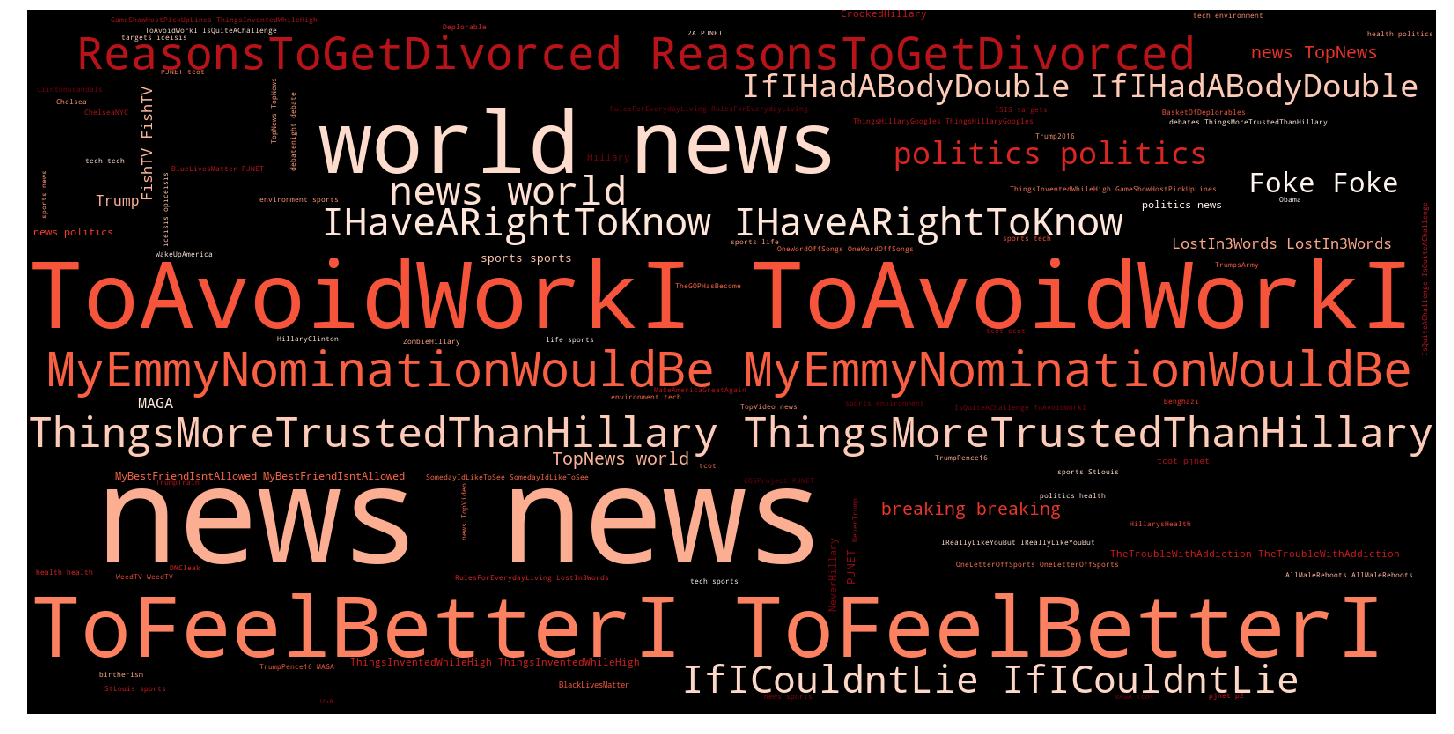

In [76]:
# make a new column to store the extracted hashtags and view them!
df_Sep2016['tweet_hashtags'] = df_Sep2016["content"].map(extract_hashtags)
df_Sep2016['tweet_hashtags'].head(10)


# create a list of all hashtags
all_hashtags = df_Sep2016['tweet_hashtags'].tolist()

# Next we observe that our all_hashtags is a list of lists...lets change that
cleaned_hashtags = []
for i in all_hashtags:
    for j in i:
            cleaned_hashtags.append(j)

# Convert cleaned_hashtags to a series and count the most frequent occuring
cleaned_hashtag_series = pd.Series(cleaned_hashtags)
hashtag_counts = cleaned_hashtag_series.value_counts()


# Get hashtag terms from the series and convert to list
hashes = cleaned_hashtag_series.values
hashes = hashes.tolist()

# convert list to one string with all the words
hashes_words = " ".join(hashes)

# generate the wordcloud. the max_words argument controls the number of words on the cloud
wordcloud = WordCloud(width= 1600, height = 800, 
                      relative_scaling = 1.0, 
                      colormap = "Reds",
                     max_words = 100).generate(hashes_words)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Text(0, 0.5, 'Hashtags')

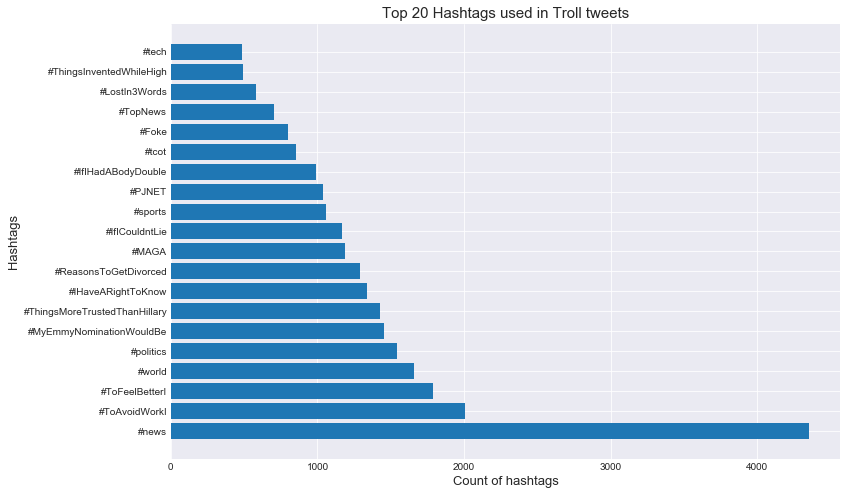

In [77]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize = (12,8))
plt.barh(y = hashtag_counts[1:21].index.values, width = hashtag_counts[1:21])
plt.title("Top 20 Hashtags used in Troll tweets", fontsize = 15)
plt.xlabel('Count of hashtags', fontsize = 13)
plt.ylabel('Hashtags', fontsize = 13)

In [104]:
df_Sep2016['clean_tweet'].count()

88466